# Sangria dataset v3.0 (2021)

In this notebook we plot all the quantities produced by the latest version of the pipeline, in order to check that everything looks fine. 

In [2]:
import sys
sys.path.append("../") # where to find pipeviewer.py
from pipeviewer import PipeViewer
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3.6/abc.py:133: FutureWarning: xarray subclass TDI should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


In [3]:
pv = PipeViewer('/lisa/sangria/run6', subpath={'dgb':'run2', 'igb':'run1'}) # using 0-padding in Fourier for GB to go from dt=15 to dt=2.5

## Catalogs

### Interacting GB

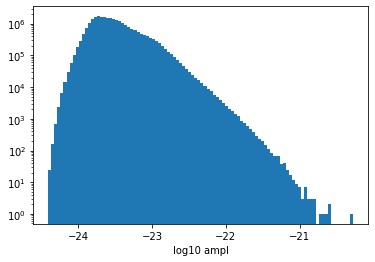

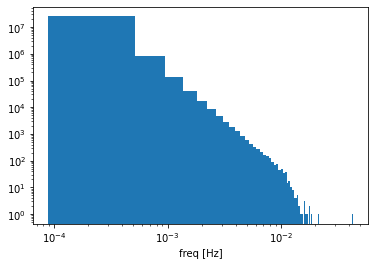

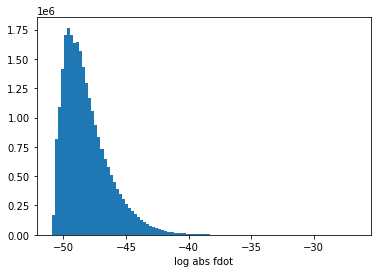

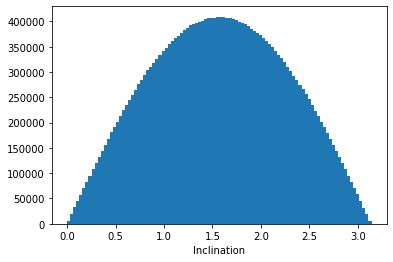

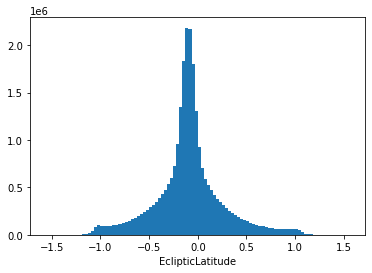

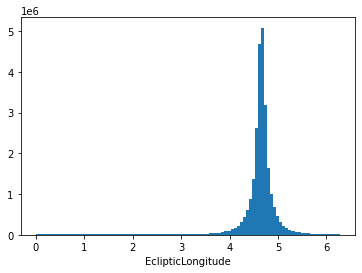

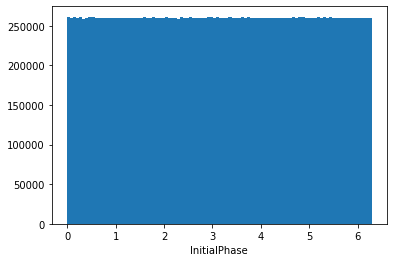

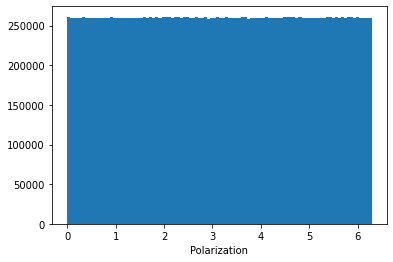

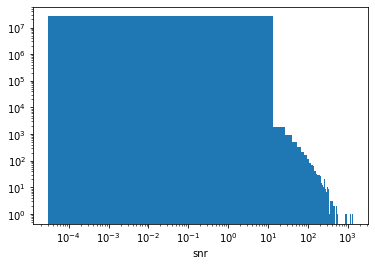

In [5]:
cat = pv.plot_catalog('dgb')

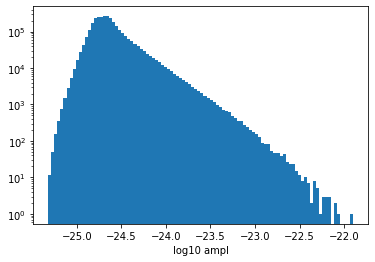

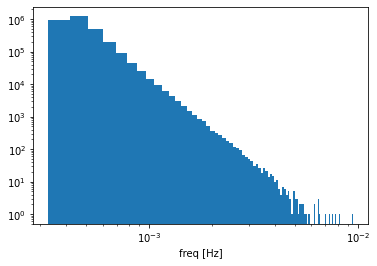

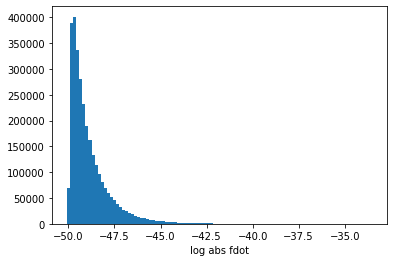

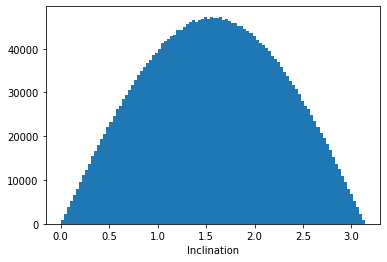

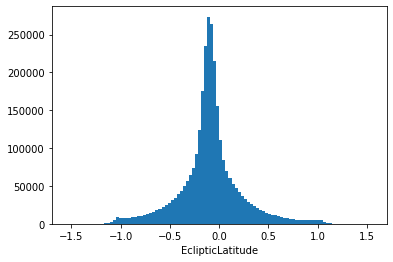

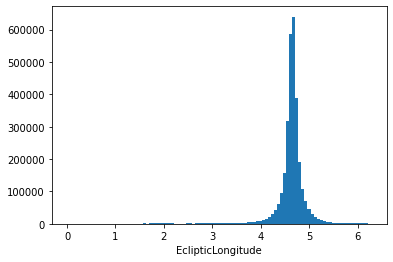

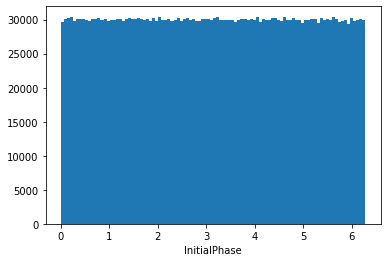

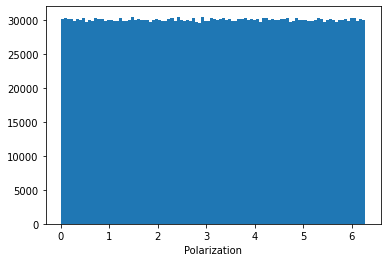

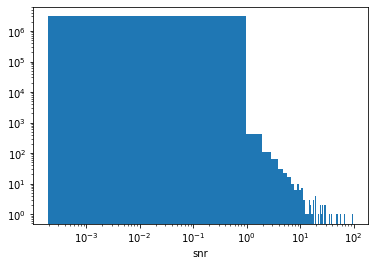

In [6]:
cat = pv.plot_catalog('igb')

### Verification GB

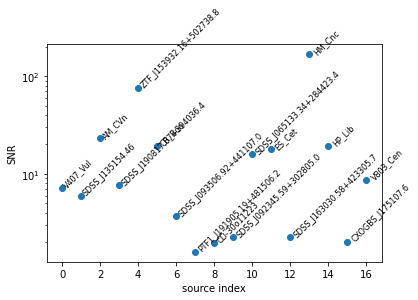

In [8]:
cat = pv.plot_catalog('vgb')

## Projected strains 

### Detached GB

Check the effect of interpolating GB strains, from dt=15s to dt=2.5s

(2e-05, 0.2, 1.5219066592434113e-22, 2.3225836086384656e-15)

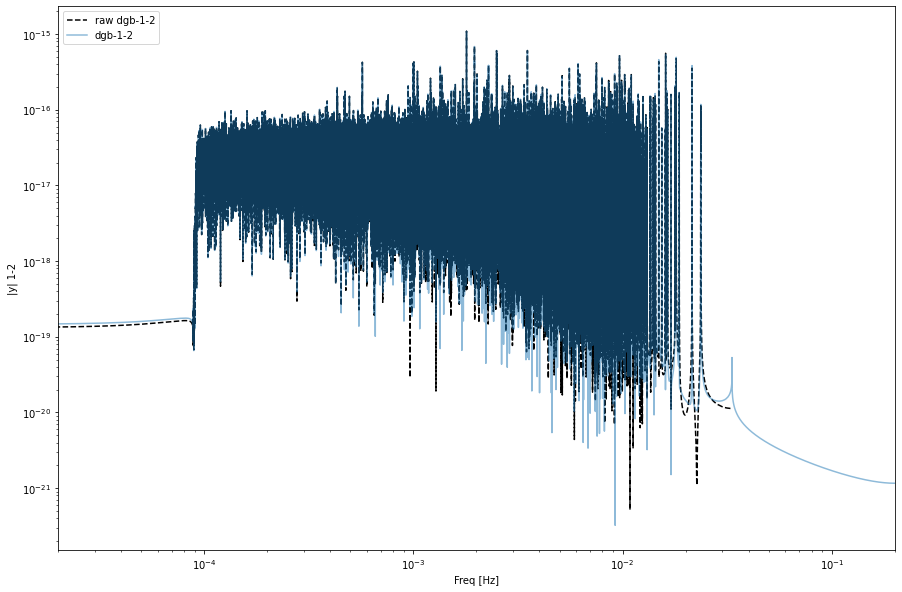

In [9]:
plt.figure(figsize=(15,10));
pv.plot_strain('dgb', time_domain=False, raw=True, ls='--', color='k') # before interpolation
pv.plot_strain('dgb', time_domain=False, alpha=0.5) # after interpolation
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

### Interacting GB

(2e-05, 0.2, 5.9781439717468956e-24, 9.060372443939572e-17)

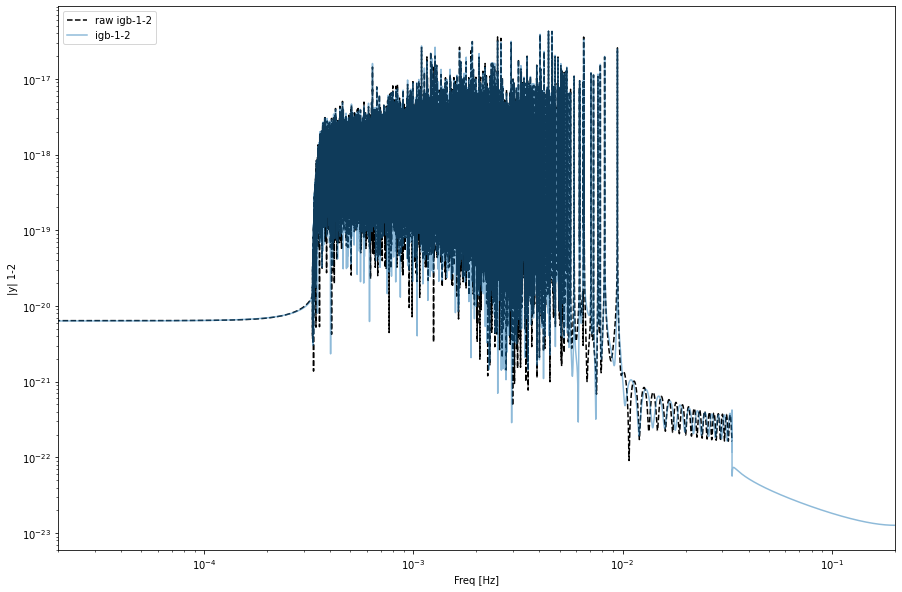

In [10]:
plt.figure(figsize=(15,10));
pv.plot_strain('igb', time_domain=False, raw=True, ls='--', color='k')
pv.plot_strain('igb', time_domain=False, alpha=0.5)
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

### Massive black hole binaries

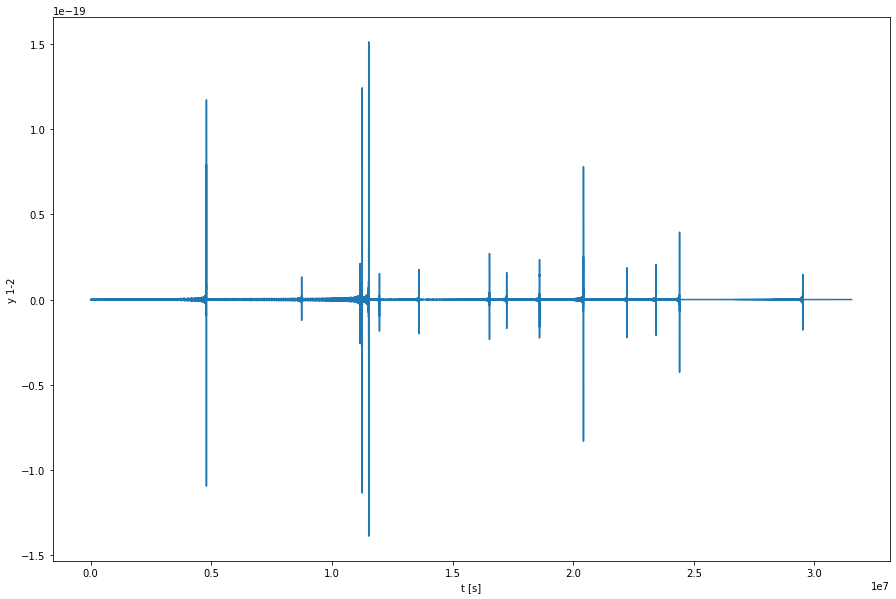

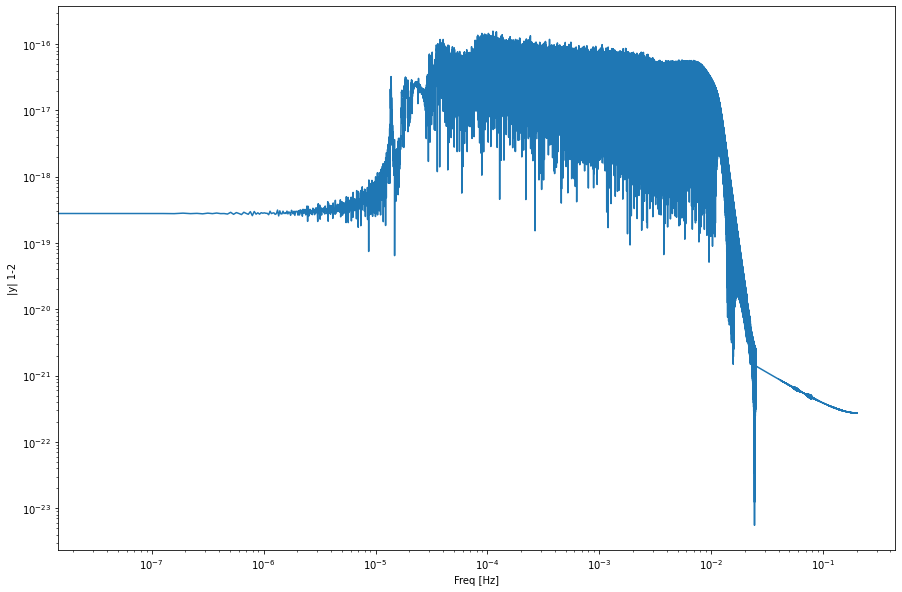

In [11]:
plt.figure(figsize=(15,10)); pv.plot_strain('mbhb')
plt.figure(figsize=(15,10)); pv.plot_strain('mbhb', time_domain=False)

## Noise free TDI 

Check the effect of interpolating GW strains, from dt=2.5s to simulator cadence dt=0.25s

### Detached GB

<xarray.DataArray (f: 3153601)>
array([ 1.15620842e-20+0.00000000e+00j,  1.15620842e-20+5.26545026e-24j,
        1.15620842e-20+1.05309025e-23j, ...,
       -6.75334795e-25-6.76407488e-30j, -6.75334778e-25-3.36657228e-30j,
       -6.75334820e-25+0.00000000e+00j])
Coordinates:
  * f        (f) float64 0.0 3.171e-08 6.342e-08 9.513e-08 ... 0.1 0.1 0.1 0.1
Attributes:
    units:    None
    df:       3.1709791983764586e-08
    kmin:     0
    t0:       0.0

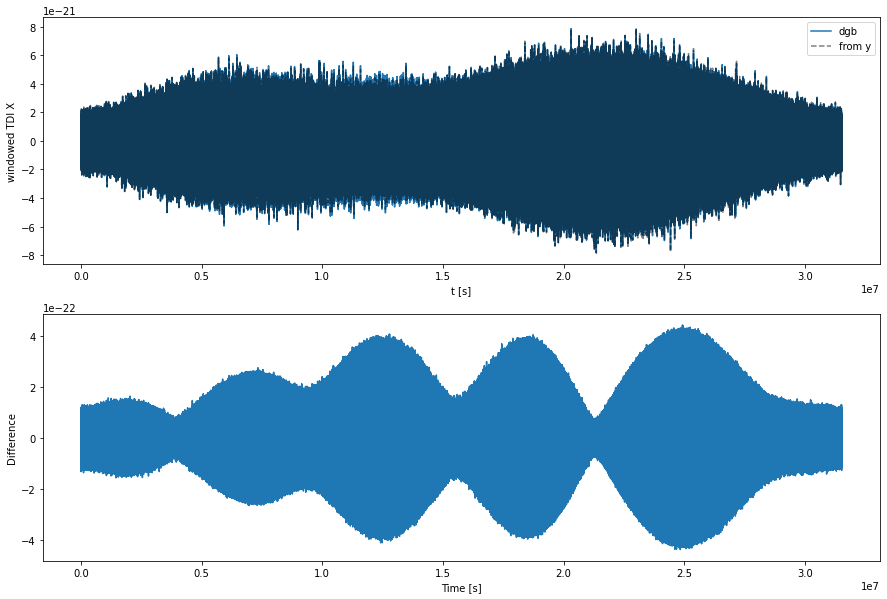

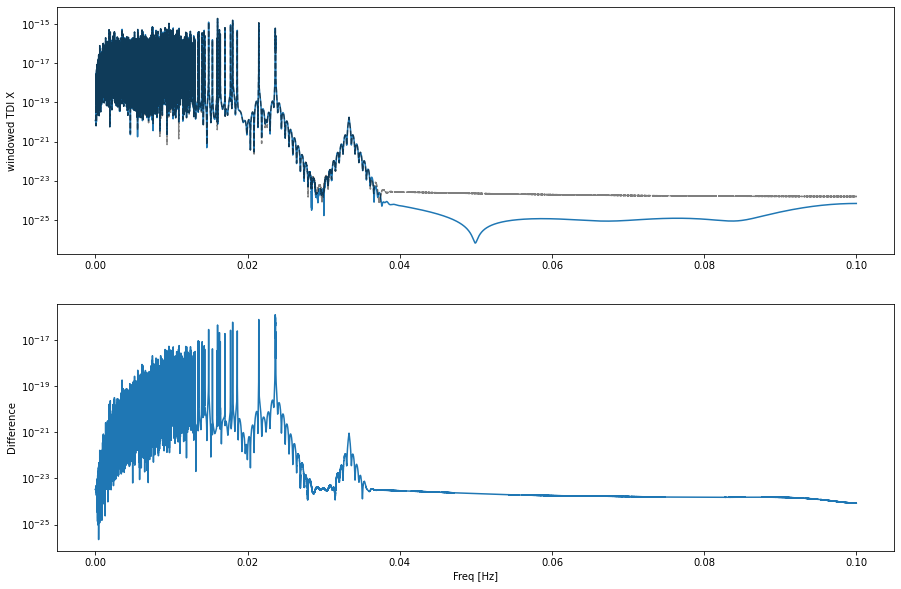

In [3]:
plt.figure(figsize=(15,10));pv.plot_tdi_x('dgb')
plt.figure(figsize=(15,10));pv.plot_tdi_x('dgb', time_domain=False)

### Massive black hole binaries

<xarray.DataArray (t: 6307200)>
array([ 1.64658312e-26,  2.93397995e-26,  5.43516589e-26, ...,
       -2.92042335e-30, -2.77584611e-30, -2.63845166e-30])
Coordinates:
  * t        (t) float64 0.0 5.0 10.0 15.0 ... 3.154e+07 3.154e+07 3.154e+07
Attributes:
    units:    None
    t0:       0.0
    dt:       5.0

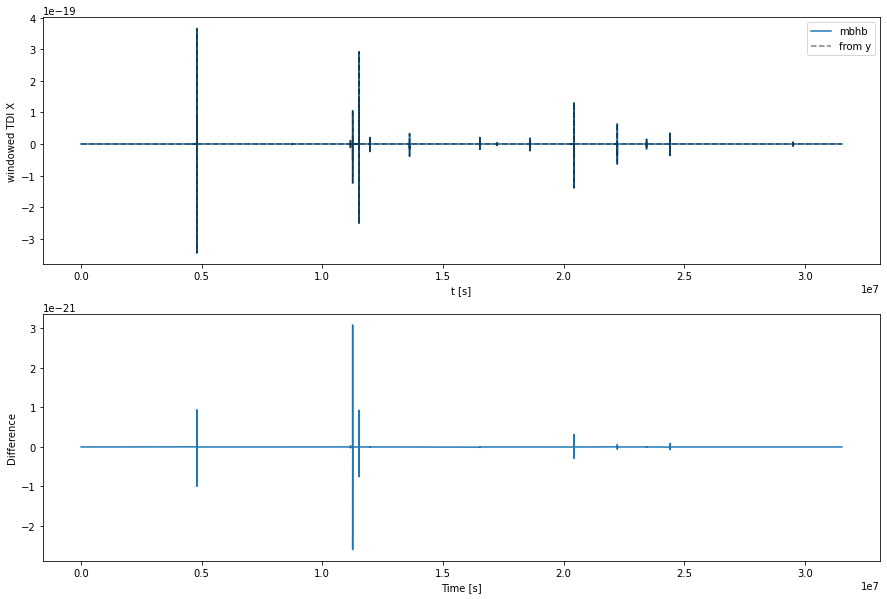

In [4]:
plt.figure(figsize=(15,10));pv.plot_tdi_x('mbhb')

## Look at specific sources

Check that the noise free TDI output matches:
- fast waveform 
- single source projection using LDC tools

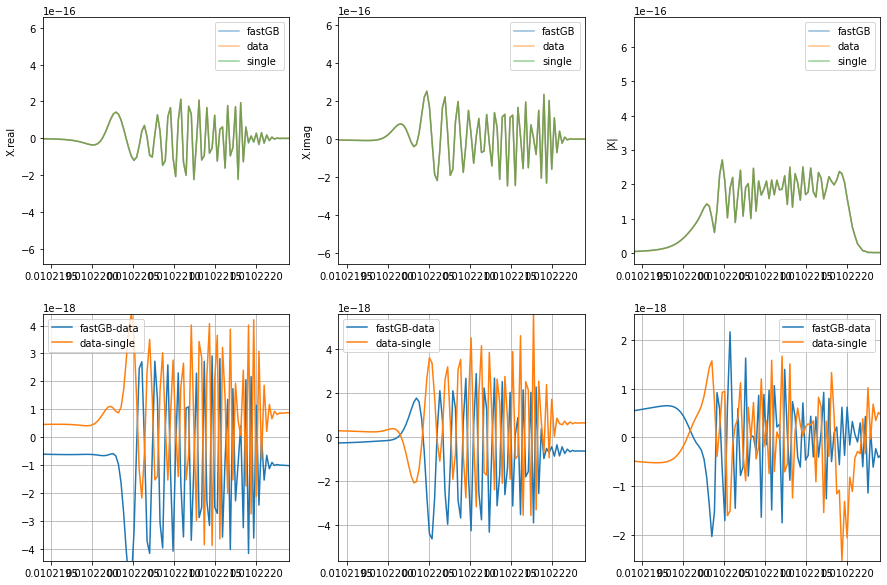

In [3]:
cat = np.array([(12401650, 1.35794643e-22, -0.51094868, 4.41775331, 
                 0.0102209, 1.32513112e-14, 
                 1.00784692, 3.18334868, 6.11709664)],
               dtype=[('Name', '<i8'), ('Amplitude', '<f8'), ('EclipticLatitude', '<f8'), ('EclipticLongitude', '<f8'), 
                      ('Frequency', '<f8'), ('FrequencyDerivative', '<f8'), 
                      ('Inclination', '<f8'), ('InitialPhase', '<f8'), ('Polarization', '<f8')])
    
plt.figure(figsize=(15,10));tdi = pv.check_gb_source(dict(zip(cat.dtype.names, cat[0])), source='dgb', single=True, pure_python=True)

- data: noise free output of the simulator
- single: single source built with the LDC tools, in time domain

<xarray.TDI>
Dimensions:  (t: 6307200)
Coordinates:
  * t        (t) float64 0.0 5.0 10.0 15.0 ... 3.154e+07 3.154e+07 3.154e+07
Data variables:
    X        (t) float64 5.956e-26 5.674e-26 5.4e-26 ... 6.53e-26 6.242e-26
    Y        (t) float64 1.457e-24 1.457e-24 1.457e-24 ... 1.456e-24 1.456e-24
    Z        (t) float64 -1.516e-24 -1.514e-24 ... -1.521e-24 -1.519e-24

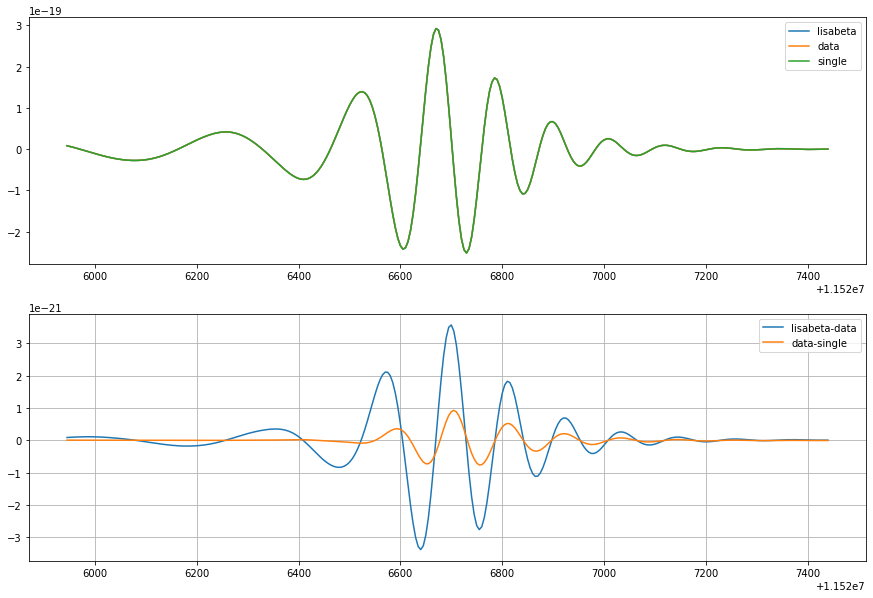

In [2]:
plt.figure(figsize=(15,10));pv.check_mbhb_source(index=0, single=True)